# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [101]:
#your code here
teams = pd.read_csv('./input/Teams.csv')
salaries = pd.read_csv('./input/Salaries.csv')
print('Teams:', list(teams.columns))
print('\nSalaries:', list(salaries.columns))

Teams: ['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']

Salaries: ['yearID', 'teamID', 'lgID', 'playerID', 'salary']


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [169]:
#your code here
total_sal = salaries.groupby(['teamID', 'yearID']).salary.sum().to_frame().reset_index()
total_sal.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [102]:
total_sal_wins = pd.merge(total_sal, teams[['teamID', 'yearID', 'W']])
total_sal_wins.head()

,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

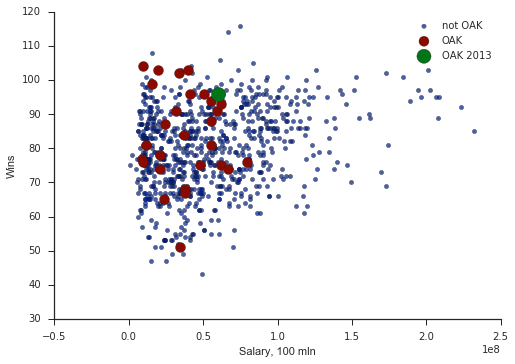

In [178]:
#your code here
import seaborn as sns
sns.set(style='ticks', context='notebook')
sns.set_color_codes('dark')
last_year = total_sal_wins.yearID.max()
not_OAK = total_sal_wins[total_sal_wins.teamID != 'OAK']
OAK = total_sal_wins[total_sal_wins.teamID == 'OAK']
plt.scatter(not_OAK.salary, not_OAK.W, label='not OAK', alpha=0.7)
plt.scatter(OAK.salary, OAK.W, c='r', s=100, label='OAK')
plt.scatter(OAK[OAK.yearID == last_year].salary, OAK[OAK.yearID == last_year].W, c='g', s=200,
            label='OAK %d' % last_year)
plt.legend(loc='best')
plt.xlabel('Salary, 100 mln')
plt.ylabel('Wins')
sns.despine()

In [164]:
# Oakland last year
print('Top wins:')
print(total_sal_wins[total_sal_wins.yearID == last_year].sort_values('W', ascending=False).reset_index().head())
print('Bottom salaries:')
print(total_sal_wins[total_sal_wins.yearID == last_year].sort_values('salary', ascending=False).reset_index().tail())

Top wins:
   index teamID  yearID     salary   W             rat
0    110    BOS    2013  151530000  97  1562164.948454
1    744    SLN    2013   92260110  97   951135.154639
2     52    ATL    2013   87871525  96   915328.385417
3    570    OAK    2013   60132500  96   626380.208333
4    628    PIT    2013   77062000  94   819808.510638
Bottom salaries:
    index teamID  yearID    salary   W            rat
25    570    OAK    2013  60132500  96  626380.208333
26    760    TBA    2013  52955272  92  575600.782609
27    541    NYN    2013  49448346  74  668220.891892
28    405    MIA    2013  33601900  62  541966.129032
29    336    HOU    2013  17890700  51  350798.039216


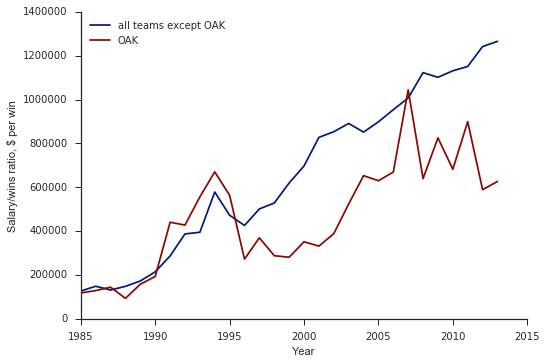

In [190]:
total_sal_wins['rat'] = total_sal_wins.salary / total_sal_wins.W
plt.plot(total_sal_wins[total_sal_wins.teamID != 'OAK'].groupby('yearID').rat.mean(), c='b', label='all teams except OAK')
oak = total_sal_wins[total_sal_wins.teamID == 'OAK']
plt.plot(oak.yearID, oak.rat, c='r', label='OAK')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Salary/wins ratio, $ per win')
sns.despine()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

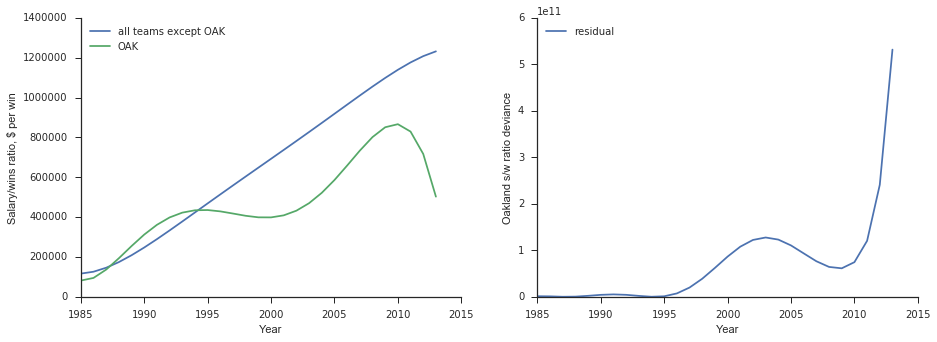

In [177]:
to_fit_all = total_sal_wins.groupby('yearID').rat.mean().reset_index()
to_fit_OAK = total_sal_wins[total_sal_wins.teamID == 'OAK'].groupby('yearID').rat.mean().reset_index()

def fit(df):
    z = np.polyfit(df.yearID, df.rat, 5)
    p = np.poly1d(z)
    return p(df.yearID)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(to_fit_all.yearID, fit(to_fit_all), label='all teams except OAK')
plt.plot(to_fit_OAK.yearID, fit(to_fit_OAK), label='OAK')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Salary/wins ratio, $ per win')
plt.subplot(1, 2, 2)
residual = (fit(to_fit_all) - fit(to_fit_OAK)) ** 2
plt.plot(to_fit_OAK.yearID, residual, label='residual')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Oakland s/w ratio deviance')
sns.despine()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

As shown on fig.1, Oakland team's salary budget is used to be quite little. It wasn't exceed 80 mln per season. In spite of this, they performed very well: red points are in upper left quarter on the fig.1. Figure 2 compares total salary/wins ratio of Oakland team and all other league teams. This ratio describes how many $ one team spends for one win (less in better, of course). We can see that since 1998 Oakland's salary/wins ratio is much less that league average value. Peak of this competitive advantage was in 2002-2003. This advantage became less significant since 2008. But in 2013 Oakland achieved great result of 96 wins (3-4 rank in league) spending a very small salary budget (26th).

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [213]:
countries = pd.read_csv('./input/countries.csv', sep=';')
print(countries.Region.unique())
countries.head()

['AFRICA' 'ASIA' 'EUROPE' 'NORTH AMERICA' 'OCEANIA' 'SOUTH AMERICA']


,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [285]:
income = pd.read_excel('./input/income.xlsx')
income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,1173,1298,1311,1548,1637,1695,1893,1884,1877,1925
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,667,667,668,668,668,668,668,668,668,668,...,7476,7977,8644,8994,9374,9640,9811,9961,10160,10620
Algeria,716,716,717,718,719,720,721,722,723,724,...,12088,12289,12314,12285,12494,12606,12779,12893,13179,13434


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [279]:
income_t = income.transpose()

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

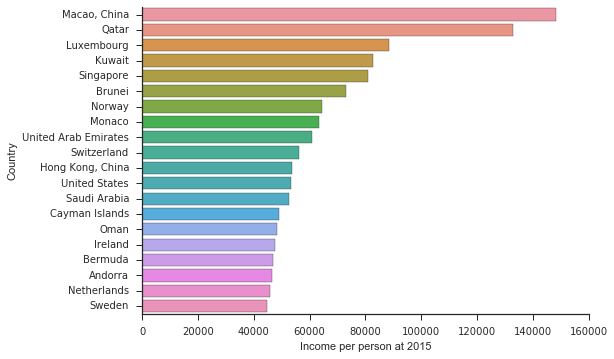

In [266]:
last_year = income.columns[-1]
sns.set_palette('dark')
ly_income = income[[last_year]].dropna().sort_values(last_year, ascending=False).reset_index().head(20)
ax = sns.barplot(y='index', x=last_year, data=ly_income, orient='h', label='Income per person')
ax.set_xlabel('Income per person at %s' % last_year)
ax.set_ylabel('Country')
sns.despine()

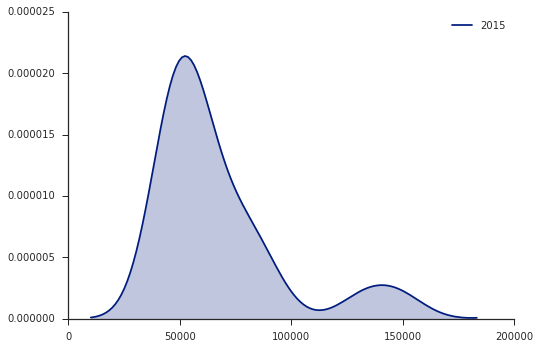

In [268]:
ax = sns.kdeplot(ly_income[last_year], shade=True)
sns.despine()

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [297]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""

def mergeByYear(year):
    return countries.set_index('Country').join(income[[year]]).reset_index()\
                    .rename(columns={'index':'Country', year:'Income'})
    
mergeByYear(2010).head()

,Country,Region,Income
0,Afghanistan,ASIA,1637
1,Albania,EUROPE,9374
2,Algeria,AFRICA,12494
3,Andorra,EUROPE,38982
4,Angola,AFRICA,7047


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

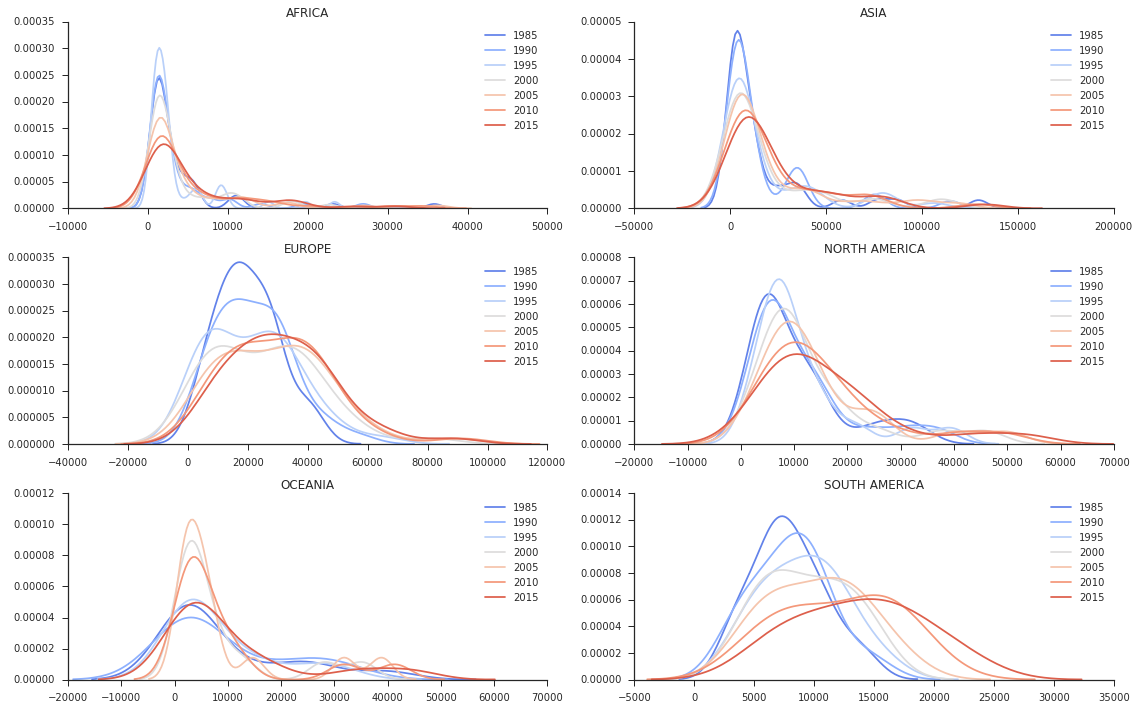

In [342]:
regs = countries.Region.unique()
cnt = 0
#colors = ['r', 'o', 'g', 'b', '']
fig, ax = plt.subplots(3, 2, figsize=(16, 10))
#sns.set_palette(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))
sns.set_palette(sns.color_palette("coolwarm", 7))
for reg in regs:
    cnt = cnt + 1
    for year in np.arange(1985, 2016, 5):
        df = mergeByYear(year)
        plt.subplot(3, 2, cnt)
        ax = sns.kdeplot(df[df.Region == reg].Income, label=year)
        ax.set_title(reg)
        
fig.tight_layout()
sns.despine()

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

We can see that average income of people in Europe and South America in 2015 is appreciably more that in 1985. One can see that distribution became less sharp. Area of high density for Europe was shifted from 10,000...25,000 to 20,000...40,000. Average income in South America is less than in Europe, but trend is the same.

Similar trend we can see for North America and Asia. But in contrast to Europe and South America, we can divide incomes in NA and Asia on two areas: small or medium (0...30,000 in NA and Asia) and high (40,000...60,000 in NA, 30,000...100,000 in Asia). It tells that there are social groups with very high incomes (much more average) in NA and Asia.

Africa is still a poor region in 2015. Density of poorest people in Africa decreased, but most likely it's connected with overall decrease of incomes in Africa.

Trends of Oceania are very interesting. It seems that Oceania suffered from a kind of great crysis in 2000...2010, but nowadays situation becomes better.

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [502]:
# """
# Function
# --------
# ratioNormals

# Return ratio of these two proportions: 
#     Pr(X > a)/Pr(Y > a) as function of 
#     the difference in the average of X 
#     and the average of Y. 

# Parameters
# ----------
# diff : difference in the average of X 
#     and the average of Y. 
# a : cutoff value

# Returns
# -------
# Returns ratio of these two proportions: 
#     Pr(X > a)/Pr(Y > a)
    
# Example
# -------
# >>> ratioNormals(diff = 1, a = 2)
# """
# from scipy.stats import norm
# def ratioNormals(diff=1, cutoff=2, plot=True):
#     # normal with mean = 0, std = 1
#     x0 = np.linspace(norm.ppf(0.001, loc=0.0, scale=1.0), norm.ppf(0.999, loc=0.0, scale=1.0), 100)
#     y0 = norm.pdf(x0, loc=0.0, scale=1.0)
#     if plot: plt.plot(x0, y0, alpha=0.3)

#     # normal with mean = diff, std = 1
#     #diff = 1
#     x1 = np.linspace(norm.ppf(0.001, loc=0.0 + diff, scale=1.0), norm.ppf(0.999, loc=0.0 + diff, scale=1.0), 100)
#     y1 = norm.pdf(x1, loc=0.0 + diff, scale=1.0)
#     if plot: plt.plot(x1, y1, c='r', alpha=0.3)

#     # cutoff
#     #cutoff = 2
#     x0g = [i for i in x0 if i > cutoff]
#     y0g = norm.pdf(x0g, loc=0.0, scale=1.0)
#     if plot: plt.plot(x0g, y0g, lw=5.0)
#     x1g = [i for i in x1 if i > cutoff]
#     y1g = norm.pdf(x1g, loc=0.0 + diff, scale=1.0)
#     if plot: plt.plot(x1g, y1g, lw=5.0, c='r')

#     return y0g.sum()/y1g.sum()
    
# print(ratioNormals(diff=-1, cutoff=1))
# sns.despine()


#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [416]:
year = 2012
df = mergeByYear(2012)
df = df[df.Region.isin(['ASIA', 'SOUTH AMERICA'])]
df.groupby('Region').Income.mean()

Region
ASIA             23500.432432
SOUTH AMERICA    13015.750000
Name: Income, dtype: float64

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [418]:
cutoff = 10000
df[df.Income > cutoff].groupby('Region').Country.count() / df.groupby('Region').Country.count()

Region
ASIA             0.477273
SOUTH AMERICA    0.750000
Name: Country, dtype: float64

Region ASIA, average income 23500.43 +/- 28403.275
Region SOUTH AMERICA, average income 13015.75 +/- 5181.693


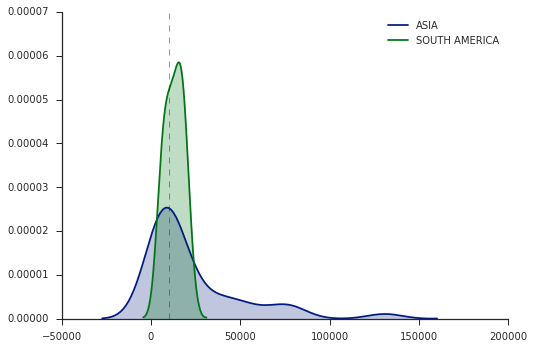

In [436]:
sns.set_palette('dark')
for reg in df.Region.unique():
    inc = df[df.Region == reg].Income
    print('Region %s, average income %.2f +/- %.3f' % (reg, inc.mean(), inc.std()))
    sns.kdeplot(inc, shade=True, label=reg)
sns.despine()
x = [10000] * 100
y = np.linspace(0, 0.00007, 100)
plt.plot(x, y, 'r--', lw=0.5)

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [495]:
popul = pd.read_excel('./input/indicator gapminder population.xlsx')
popul = popul.rename(columns={'Total population':'Country'}).set_index('Country')

In [496]:
def mergeByYear(year):
    a = countries.set_index('Country').join(income[[year]]).reset_index()\
                    .rename(columns={'index':'Country', year:'Income'})
    a = a.set_index('Country').join(popul[[year]]).reset_index()\
                .rename(columns={'index':'Country', year:'Population'})
    a['TotalIncome'] = a.Income * a.Population
    return a
    
mergeByYear(2010).head()

,Country,Region,Income,Population,TotalIncome
0,Afghanistan,ASIA,1637,27962207,4.577413e+10
1,Albania,EUROPE,9374,2901883,2.720225e+10
2,Algeria,AFRICA,12494,36036159,4.502358e+11
3,Andorra,EUROPE,38982,84419,3.290821e+09
4,Angola,AFRICA,7047,21219954,1.495370e+11


In [497]:
year = 2012
df = mergeByYear(2012)
df = df[df.Region.isin(['ASIA', 'SOUTH AMERICA'])]
print('Average income per person', df.groupby('Region').TotalIncome.sum() / df.groupby('Region').Population.sum())

year = 2012
df = mergeByYear(2012)
df = df[df.Region.isin(['ASIA', 'SOUTH AMERICA'])]
print('\nAverage income per person across countries', df.groupby('Region').Income.mean())

Average income per person Region
ASIA              9724.724727
SOUTH AMERICA    14564.835293
dtype: float64

Average income per person across countries Region
ASIA             23500.432432
SOUTH AMERICA    13015.750000
Name: Income, dtype: float64


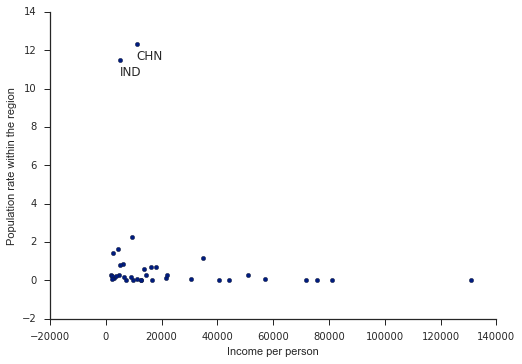

In [501]:
df_asia = df[df.Region == 'ASIA'].dropna()
av_pop = df_asia.Population.sum() / df_asia.Country.count()
df_asia['pop_av_rate'] = np.round(df_asia.Population / av_pop, 3)
df_asia.sort_values('Income')
plt.scatter(df_asia.Income, df_asia.pop_av_rate)
df_chn = df_asia[df_asia.Country == 'China']
df_ind = df_asia[df_asia.Country == 'India']
plt.annotate('CHN', xy=(df_chn.Income, df_chn.pop_av_rate-0.8))
plt.annotate('IND', xy=(df_ind.Income, df_ind.pop_av_rate-0.8))
plt.xlabel('Income per person')
plt.ylabel('Population rate within the region')
sns.despine()

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

Average income in Asia is bigger than average income in South America. It happens because of large amount of very rich people in Asia. Their incomes are much more than average, so they produce huge affect on average value. But rate of these people is little. In South America there are only a few people with income greater than 25,000, std of SA income distribution is very small (SA - 5,181, Asia - 28,403). That's why proportion of countries with income per person greater than 10,000 is larger in SA than in Asia.

But if we calculate average income per person in Asia and South America NOT across countries, we can see that av. income in Asia LESS than av. income in SA ($9,722 < 14,500$). Is seems paradoxically but it's easy to explain. It happens because there are two countries in Asia (China and India) with low average income and huge population. Look at the figure above. Population of China and India is 12 times more than average country population in Asia.

Let's see how to calculate average income without separating by countries: $i = \frac{i_1 p_1 + \ldots + i_n p_n}{\sum_n p_i} = i_i\frac{p_i}{P} + \ldots + i_n\frac{p_n}{P}$. Average income is weighted sum of average incomes per country. Weight coefficients are rate or country population in region. So, China and India have very small income but corresponding weights in this sum are singnificant. So, it results to decrease of average income.

---